## Important

`run_raxml.sh` in `Genome_tree` to build tree before this notebook.

In [1]:
library(ape)
library(jsonlite)
suppressPackageStartupMessages(library(ggtree))

dataDir <- "Data"
genomeTreeDir <- "Genome_tree"
genomeTreeEXDir <- "Genome_tree_EX"
snpCompareDir <- "SNPs_comparison"
figuresDir <- "Figures"

Warning message:
"package 'jsonlite' was built under R version 3.6.2"


Saving 6.67 x 6.67 in image



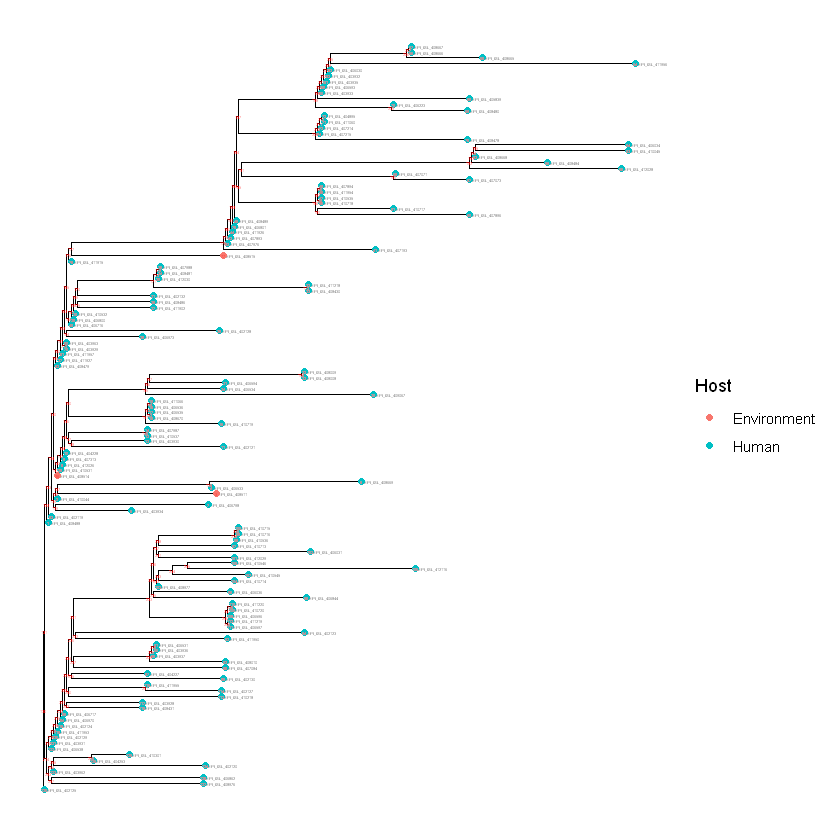

In [2]:
tree <- read.tree(file.path(genomeTreeDir, "RAxML_bestTree.GTRGAMMA"))
info <- read.csv(file.path(dataDir, "info.csv"))
p <- ggtree(tree)
p <- p %<+% info + 
    geom_tiplab(size = 0.75) + 
    geom_tippoint(aes(color=Host)) + 
    geom_text(aes(label=node), size = 0.75, color = "red")
p

ggsave(filename = file.path(figuresDir, "tree.pdf"), p)

In [3]:
genotypes <- list()
subGenotypes <- list()

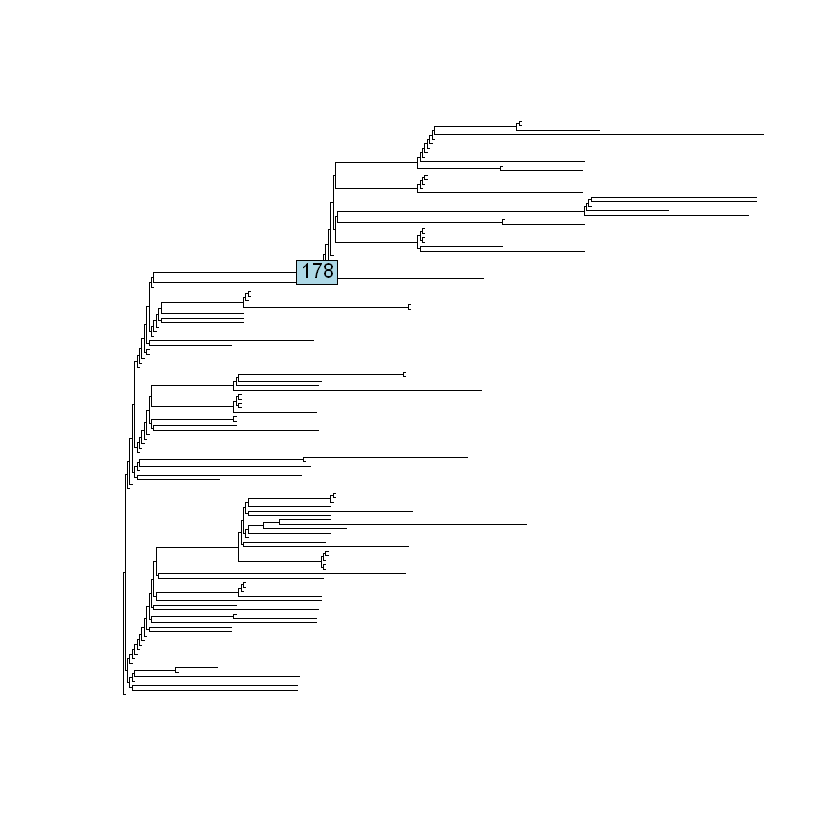

In [4]:
cladeNode = 178
plot(ladderize(tree, FALSE), show.tip.label = FALSE)
nodelabels(node=cladeNode)

genotypes[["G1"]] <- extract.clade(tree, cladeNode)$tip.label
subGenotypes[["G1"]] <- extract.clade(tree, cladeNode)$tip.label

genotypes[["G2"]] <- setdiff(tree$tip.label, unlist(genotypes))

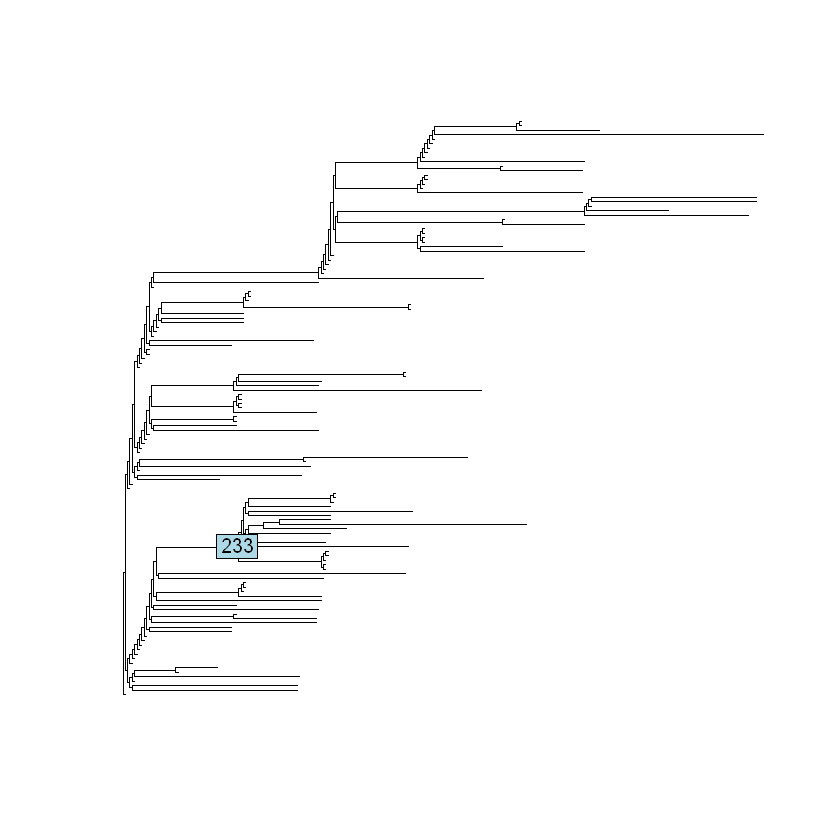

In [5]:
cladeNode = 233
plot(ladderize(tree, FALSE), show.tip.label = FALSE)
nodelabels(node=cladeNode)

subGenotypes[["G2.1"]] <- extract.clade(tree, cladeNode)$tip.label
subGenotypes[["G2"]] <- setdiff(tree$tip.label, unlist(subGenotypes))

In [6]:
write_json(x = genotypes, path = file.path(dataDir, "genotypes.json"))
write_json(x = subGenotypes, path = file.path(dataDir, "sub_genotypes.json"))

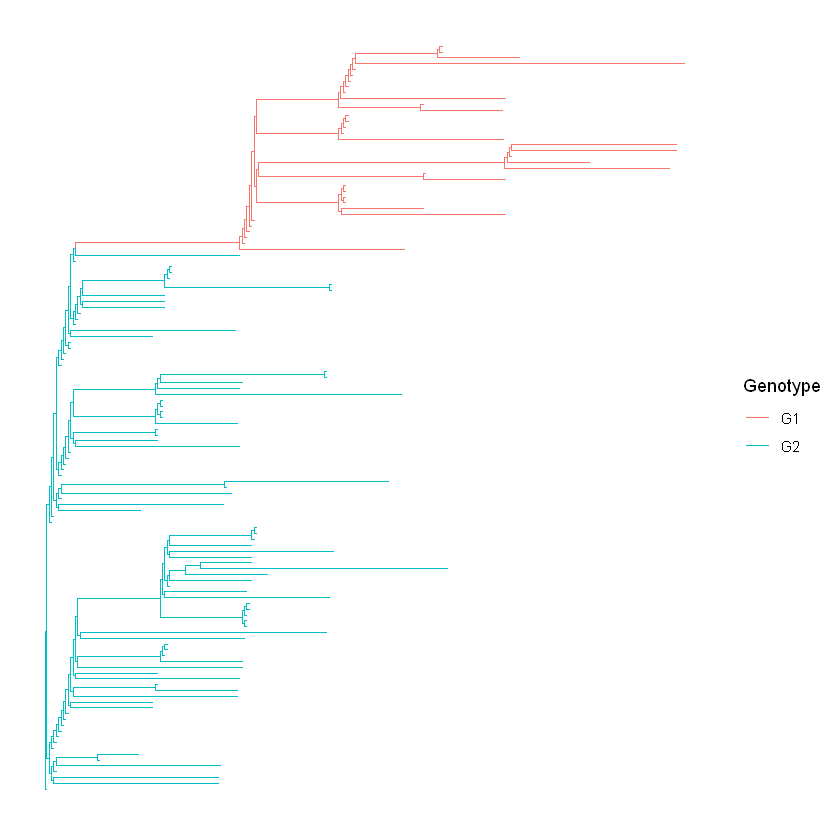

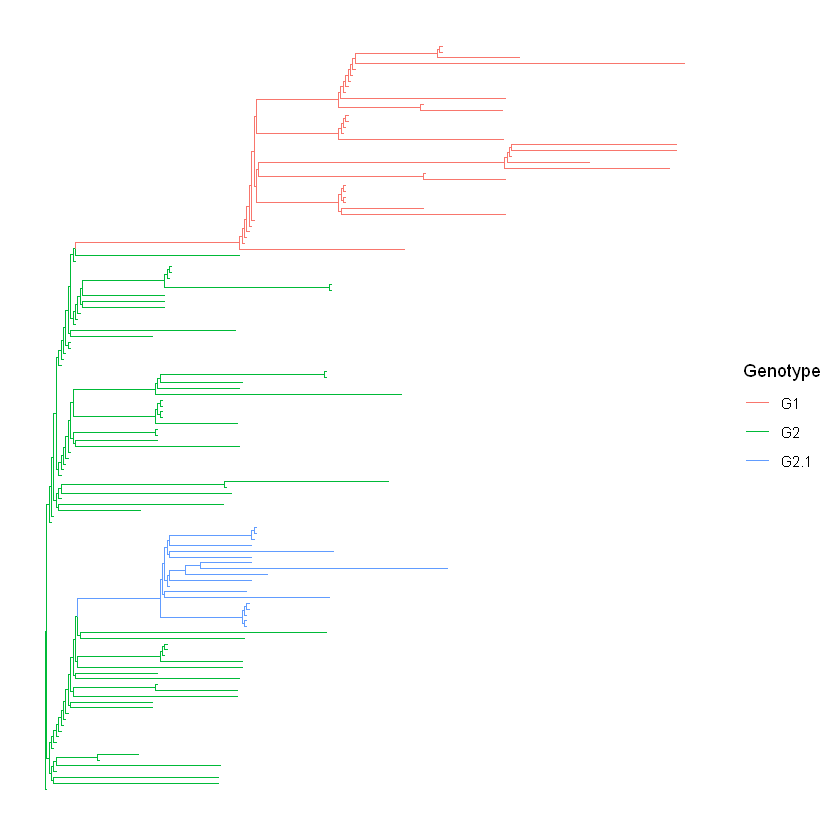

In [7]:
ggtree(groupOTU(tree, genotypes, "Genotype")) + aes(color=Genotype)
ggtree(groupOTU(tree, subGenotypes, "Genotype")) + aes(color=Genotype)

In [8]:
# tree <- read.tree(file.path(genomeTreeEXDir, "CoV_all_upper.fasta.treefile"))
tree <- read.tree(file.path(genomeTreeEXDir, "RAxML_bestTree.GTRGAMMA"))

In [9]:
info[["Category"]] <- as.character(info[["Host"]])

for (gp in names(genotypes)) {
    tipNames <- genotypes[[gp]]
    for (t in tipNames) {
        host <- info[which(info[["Accession.ID"]] == t), "Host"]
        if (host == "Human") {
            info[which(info[["Accession.ID"]] == t), "Category"] <- gp
        } else {
            info[which(info[["Accession.ID"]] == t), "Category"] <- host
        }
    }
    
}

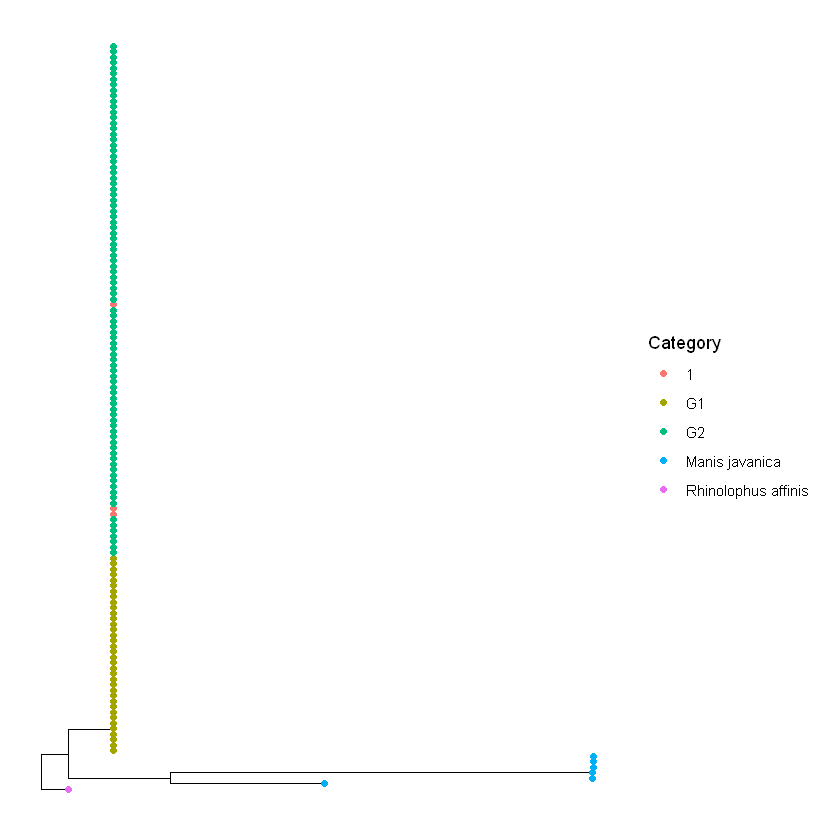

In [10]:
p <- ggtree(tree)
p <- p %<+% info + 
    geom_tippoint(aes(color=Category))
p